In [9]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from IPython.display import display, Math, Latex
import math
pi=math.pi
import cmath

#import scipy
from scipy import special

In [20]:
D=2e-6
rho_p=1040
rho_f=998
k=1e-4
R=D/2.
kB=1.381e-23
deltaT=10
T0=293.15
eta=2.414e-5*10**(247.8/(T0-140))
rho_f=0.14395/(0.0112**(1+(1-T0/649.727)**0.05107))
drag=6*pi*eta*R
Diff_const=kB*T0/drag
V_p=4/3.*pi*R**3
M_p=rho_p*V_p
M_f=rho_f*V_p
M_eff=M_p+M_f/2
tau_p=M_p/(6*pi*eta*R)
tau_f=R**2*rho_f/eta
tau_k=drag/k

eta_inf = 0.02984e-3
T_VF = 152
theta = deltaT/(T0-T_VF)

#Thot=T0+deltaT
Thot=T0+5/12*deltaT+math.log(eta/eta_inf)/(22*(T0+deltaT-T_VF))*deltaT**2
etahot=2.414e-5*10**(247.8/(Thot-140))
rho_fhot=0.14395/(0.0112**(1+(1-Thot/649.727)**0.05107))
draghot=6*pi*etahot*R
#Diff_consthot=kB*Thot/drag
M_fhot=rho_fhot*V_p
M_effhot=M_p+M_fhot/2
tau_phot=M_p/(6*pi*etahot*R)
tau_fhot=R**2*rho_fhot/etahot
tau_khot=draghot/k

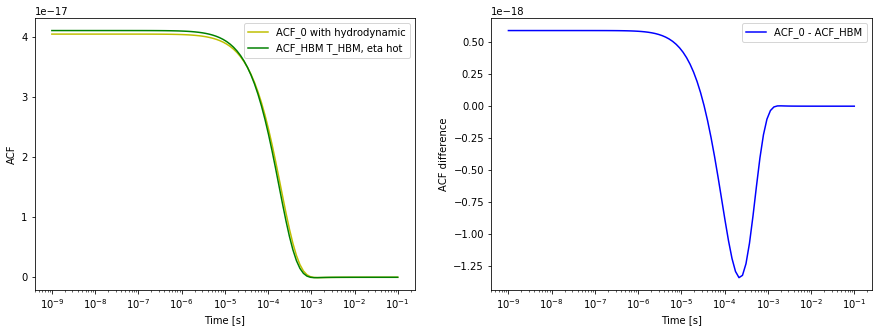

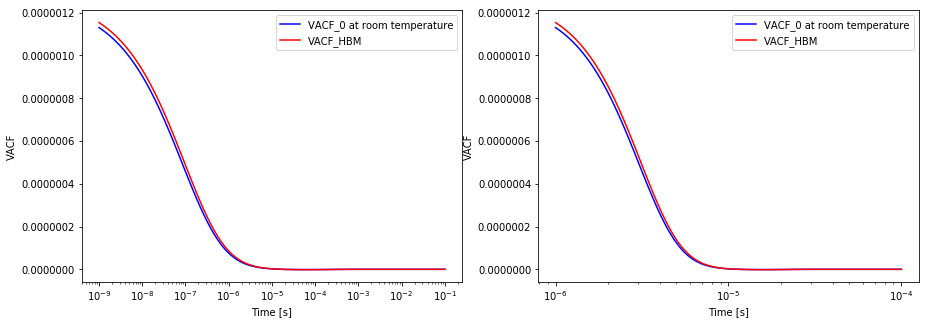

In [21]:
t = np.logspace(-9,-1,num=100)
time = np.zeros(100)
ACFhot = np.zeros(100)
ACFcold = np.zeros(100)
deltaACF = np.zeros(100)

#ACF part
polyCoefscold=[tau_p+tau_f/9,-np.sqrt(tau_f),1,0,1/tau_k]
polyRootscold=np.roots(polyCoefscold);
z1cold=polyRootscold[0]
z2cold=polyRootscold[1]
z3cold=polyRootscold[2]
z4cold=polyRootscold[3]
fraction1cold=(z1cold*(z1cold-z2cold)*(z1cold-z3cold)*(z1cold-z4cold))
fraction2cold=(z2cold*(z2cold-z1cold)*(z2cold-z3cold)*(z2cold-z4cold))
fraction3cold=(z3cold*(z3cold-z1cold)*(z3cold-z2cold)*(z3cold-z4cold))
fraction4cold=(z4cold*(z4cold-z1cold)*(z4cold-z2cold)*(z4cold-z3cold))
term1cold=special.wofz(1j*z1cold*np.sqrt(10))/fraction1cold
term2cold=special.wofz(1j*z2cold*np.sqrt(10))/fraction2cold
term3cold=special.wofz(1j*z3cold*np.sqrt(10))/fraction3cold
term4cold=special.wofz(1j*z4cold*np.sqrt(10))/fraction4cold
constant=np.real(2*kB*T0/k+2*kB*T0/M_eff*(term1cold+term2cold+term3cold+term4cold))

polyCoefsn=[tau_phot+tau_fhot/9,-np.sqrt(tau_fhot),1,0,1/tau_khot]
polyRootsn=np.roots(polyCoefsn);
z1n=polyRootsn[0]
z2n=polyRootsn[1]
z3n=polyRootsn[2]
z4n=polyRootsn[3]
fraction1n=(z1n*(z1n-z2n)*(z1n-z3n)*(z1n-z4n))
fraction2n=(z2n*(z2n-z1n)*(z2n-z3n)*(z2n-z4n))
fraction3n=(z3n*(z3n-z1n)*(z3n-z2n)*(z3n-z4n))
fraction4n=(z4n*(z4n-z1n)*(z4n-z2n)*(z4n-z3n))
term1n=special.wofz(1j*z1n*np.sqrt(10))/fraction1n
term2n=special.wofz(1j*z2n*np.sqrt(10))/fraction2n
term3n=special.wofz(1j*z3n*np.sqrt(10))/fraction3n
term4n=special.wofz(1j*z4n*np.sqrt(10))/fraction4n
constant2=np.real(2*kB*Thot/k+2*kB*Thot/M_effhot*(term1n+term2n+term3n+term4n))

for i in range(100):
    time=t[i]
    term1cold=special.wofz(1j*z1cold*np.sqrt(time))/fraction1cold
    term2cold=special.wofz(1j*z2cold*np.sqrt(time))/fraction2cold
    term3cold=special.wofz(1j*z3cold*np.sqrt(time))/fraction3cold
    term4cold=special.wofz(1j*z4cold*np.sqrt(time))/fraction4cold
    ACFcold[i]=constant/2-np.real(2*kB*T0/k+2*kB*T0/M_eff*(term1cold+term2cold+term3cold+term4cold))/2
    
    term1n=special.wofz(1j*z1n*np.sqrt(time))/fraction1n
    term2n=special.wofz(1j*z2n*np.sqrt(time))/fraction2n
    term3n=special.wofz(1j*z3n*np.sqrt(time))/fraction3n
    term4n=special.wofz(1j*z4n*np.sqrt(time))/fraction4n
    ACFhot[i]=constant2/2-np.real(2*kB*Thot/k+2*kB*Thot/M_effhot*(term1n+term2n+term3n+term4n))/2

#VACF part
VACFhot = np.zeros(100)
VACFhotT = np.zeros(100)
VACFcold = np.zeros(100)
deltaVACF = np.zeros(100)
deltaVACF2 = np.zeros(100)
polyCoefscold=[tau_p+tau_f/9,-np.sqrt(tau_f),1,0,1/tau_k]
polyRootscold=np.roots(polyCoefscold);
z1cold=polyRootscold[0]
z2cold=polyRootscold[1]
z3cold=polyRootscold[2]
z4cold=polyRootscold[3]
fraction1cold=(z1cold-z2cold)*(z1cold-z3cold)*(z1cold-z4cold)
fraction2cold=(z2cold-z1cold)*(z2cold-z3cold)*(z2cold-z4cold)
fraction3cold=(z3cold-z1cold)*(z3cold-z2cold)*(z3cold-z4cold)
fraction4cold=(z4cold-z1cold)*(z4cold-z2cold)*(z4cold-z3cold)
polyCoefsn=[tau_phot+tau_fhot/9,-np.sqrt(tau_fhot),1,0,1/tau_khot]
polyRootsn=np.roots(polyCoefsn);
z1n=polyRootsn[0]
z2n=polyRootsn[1]
z3n=polyRootsn[2]
z4n=polyRootsn[3]
fraction1n=(z1n-z2n)*(z1n-z3n)*(z1n-z4n)
fraction2n=(z2n-z1n)*(z2n-z3n)*(z2n-z4n)
fraction3n=(z3n-z1n)*(z3n-z2n)*(z3n-z4n)
fraction4n=(z4n-z1n)*(z4n-z2n)*(z4n-z3n)
for i in range(100):
    time=t[i]
    term1cold=z1cold**3*special.wofz(1j*z1cold*np.sqrt(time))/fraction1cold
    term2cold=z2cold**3*special.wofz(1j*z2cold*np.sqrt(time))/fraction2cold
    term3cold=z3cold**3*special.wofz(1j*z3cold*np.sqrt(time))/fraction3cold
    term4cold=z4cold**3*special.wofz(1j*z4cold*np.sqrt(time))/fraction4cold
    VACFcold[i]=np.real(2*kB*T0/k+2*kB*T0/M_eff*(term1cold+term2cold+term3cold+term4cold))
    
    term1n=z1n**3*special.wofz(1j*z1n*np.sqrt(time))/fraction1n
    term2n=z2n**3*special.wofz(1j*z2n*np.sqrt(time))/fraction2n
    term3n=z3n**3*special.wofz(1j*z3n*np.sqrt(time))/fraction3n
    term4n=z4n**3*special.wofz(1j*z4n*np.sqrt(time))/fraction4n
    VACFhot[i]=np.real(2*kB*Thot/k+2*kB*Thot/M_effhot*(term1n+term2n+term3n+term4n))
    
image = plt.figure(1, figsize = (15,5))
#plt.figure(1, figsize = (15,5))
plt.subplot(121)
plt.semilogx(t,ACFcold,'y',label='ACF_0 with hydrodynamic')
plt.semilogx(t,ACFhot,'g',label='ACF_HBM T_HBM, eta hot')
plt.xlabel('Time [s]')
plt.ylabel('ACF')
plt.legend()

deltaACF=ACFhot-ACFcold

plt.subplot(122)
plt.semilogx(t, deltaACF,'b',label='ACF_0 - ACF_HBM')
plt.xlabel('Time [s]')
plt.ylabel('ACF difference')
plt.legend()
plt.show()
image.savefig("foo.pdf", bbox_inches='tight')

image = plt.figure(1, figsize = (15,5))
plt.subplot(121)
plt.semilogx(t,VACFcold,'b',label='VACF_0 at room temperature')
plt.semilogx(t,VACFhot,'r',label='VACF_HBM')
plt.xlabel('Time [s]')
plt.ylabel('VACF')
plt.legend()

t2 = np.logspace(-6,-4,num=100)
plt.subplot(122)
plt.semilogx(t2,VACFcold,'b',label='VACF_0 at room temperature')
plt.semilogx(t2,VACFhot,'r',label='VACF_HBM')
plt.xlabel('Time [s]')
plt.ylabel('VACF')
plt.legend()
plt.show()